<a href="https://colab.research.google.com/github/PavelStelmakhV/hw304-csipy/blob/main/Hw4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy import integrate

In [2]:
alpha = 0.5
beta = 0.3
N = 1_000_000
S0 = 990_000
I0 = 7000
R0 = 3000
t0, tf = 0, 25
t = np.linspace(t0, tf, 26)

## Susceptible

In [3]:
def dSdt(t, S):
    return -alpha * S

In [16]:
susceptible = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True, t_eval=t)

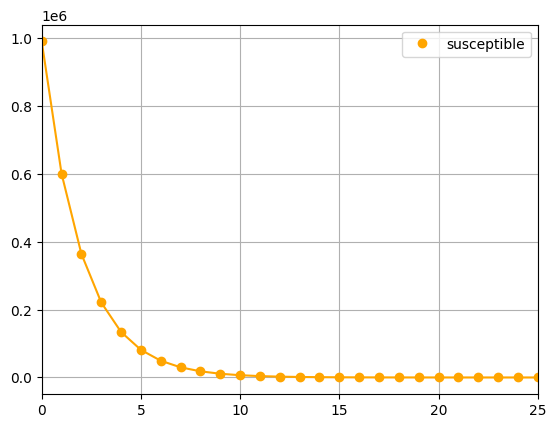

In [17]:
plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')
plt.legend()
plt.xlim(t0, tf)
# plt.ylim(0, 130)
plt.grid()

In [18]:
def dIdt(t, I):
    return - alpha ** 2 * t - beta * I

In [19]:
infected = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True, t_eval=t)

In [20]:
infected

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  2.400e+01  2.500e+01]
        y: [[ 7.000e+03  5.186e+03 ... -1.198e+01 -1.417e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fbfc91a87f0>
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0

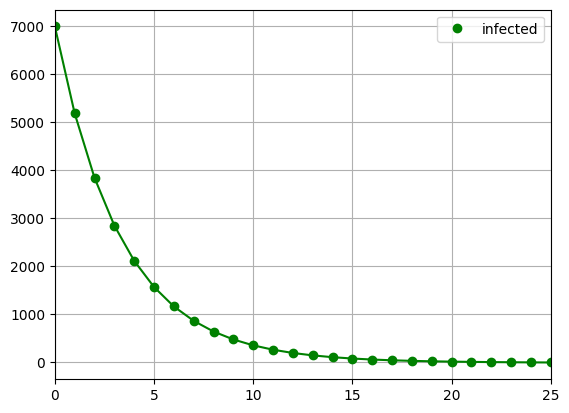

In [21]:
plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')
plt.legend()
plt.xlim(t0, tf)
# plt.ylim(0, 130)
plt.grid()

## Recovered

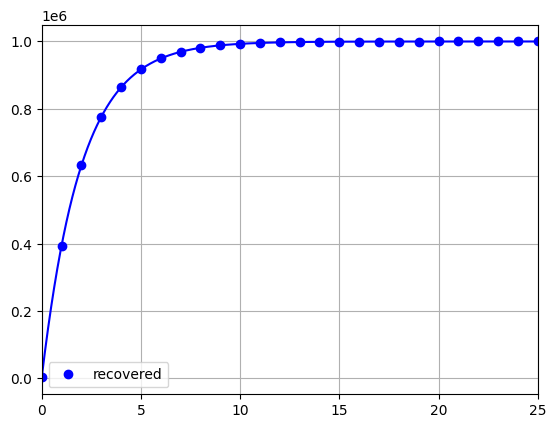

In [22]:
recovered = interp1d(susceptible.t, N - susceptible.y[0] - infected.y[0], kind='cubic')

plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
more_date = np.linspace(t0, tf, 10000)
plt.plot(more_date, recovered(more_date), color='blue')
plt.legend()
plt.xlim(t0, tf)
plt.grid()

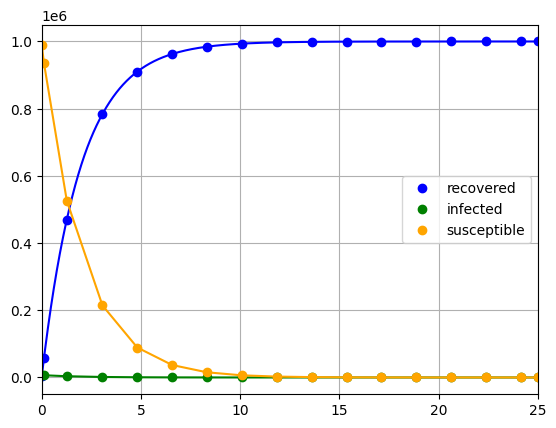

In [11]:
plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
plt.plot(more_date, recovered(more_date), color='blue')

plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')

plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')

plt.legend()
plt.xlim(t0, tf)
plt.grid()